In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from random import seed
from random import randrange
import joblib
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy import interp

In [ ]:
from drive.MyDrive.DL.Assignment_2 import dl_toolkit as mlp
#import dl_toolkit as mlp

In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_2/train_set.pkl')

In [ ]:
def makeData(data):
  X = np.array(data['Image'][0])
  X = X.reshape((1, X.shape[0] * X.shape[1]))
  y = np.full((data.shape[0],), -1)
  y[0] = data['Labels'][0]
  for i in range(1,data.shape[0]):
    x = np.array(data['Image'][i])
    x = x.reshape((1, x.shape[0] * x.shape[1]))
    X = np.concatenate((X, x))
    y[i] = data['Labels'][i]
  return X, y

In [ ]:
X_train, y_train = makeData(data)

In [ ]:
data1 = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_2/val_set.pkl')
X_test, y_test = makeData(data1)

In [ ]:
def plotting_epochs(training_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'blue', linewidth=2.0)
  plt.legend([lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

def heatMap(y_test, y_pred, figsize):
  log_cm = metrics.confusion_matrix(np.array(y_test).astype('int'), y_pred.astype('int'))

  f, p = plt.subplots(figsize=figsize)
  sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
  plt.title('Confusion Matrix', size=16)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Original Labels', size=14)
  plt.show()

# RMSProp

In [ ]:
obj1 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, optimizer='RMS')
obj1.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj1.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.790 - Training Loss: 7.234
Epoch:2/100 
	==============================> Training Accuracy: 0.839 - Training Loss: 5.547
Epoch:3/100 
	==============================> Training Accuracy: 0.876 - Training Loss: 4.273
Epoch:4/100 
	==============================> Training Accuracy: 0.918 - Training Loss: 2.818
Epoch:5/100 
	==============================> Training Accuracy: 0.914 - Training Loss: 2.970
Epoch:6/100 
	==============================> Training Accuracy: 0.927 - Training Loss: 2.515
Epoch:7/100 
	==============================> Training Accuracy: 0.951 - Training Loss: 1.705
Epoch:8/100 
	==============================> Training Accuracy: 0.945 - Training Loss: 1.893
Epoch:9/100 
	==============================> Training Accuracy: 0.968 - Training Loss: 1.105
Epoch:10/100 
	==============================> Training Accuracy: 0.960 - Training Loss: 1.389
Epoch:11/100 
	==============================> Training Acc

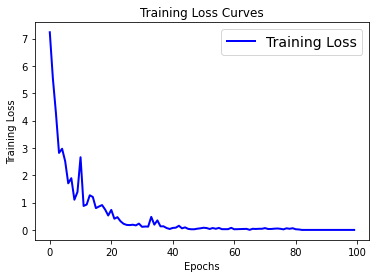

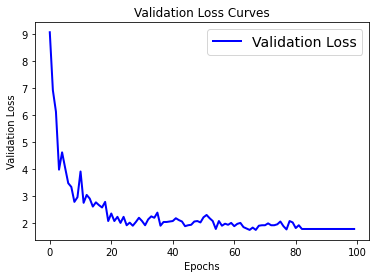

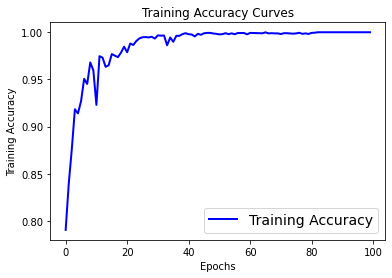

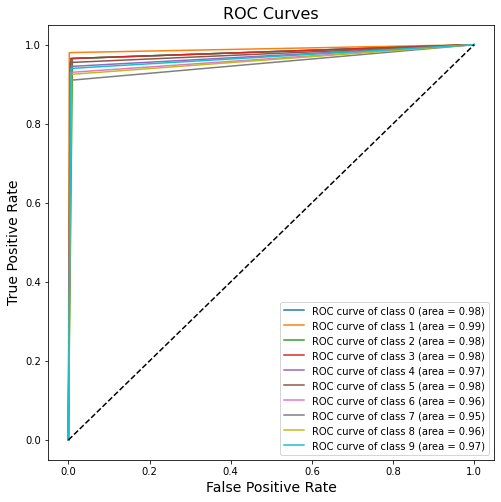

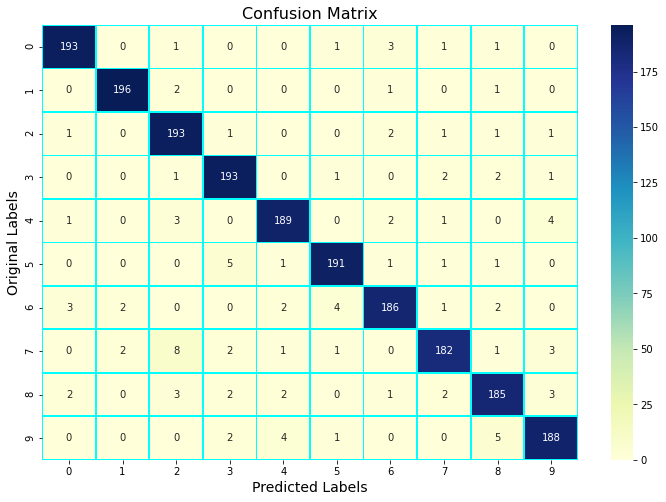

In [ ]:
# joblib.dump(obj1, '/content/drive/MyDrive/DL/Assignment_2/RMS_Q2')
obj1 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/RMS_Q2')
l1,l2=obj1.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj1.get_accuracy(), 'Training Accuracy')
obj1.roc_curve(X_test, y_test)
y_pred = obj1.predict(X_test)
heatMap(y_test, y_pred, (12,8))

# AdaGrad

In [ ]:
obj2 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, optimizer='Ada')
obj2.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj2.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.753 - Training Loss: 8.533
Epoch:2/100 
	==============================> Training Accuracy: 0.872 - Training Loss: 4.418
Epoch:3/100 
	==============================> Training Accuracy: 0.902 - Training Loss: 3.399
Epoch:4/100 
	==============================> Training Accuracy: 0.942 - Training Loss: 1.998
Epoch:5/100 
	==============================> Training Accuracy: 0.951 - Training Loss: 1.676
Epoch:6/100 
	==============================> Training Accuracy: 0.948 - Training Loss: 1.804
Epoch:7/100 
	==============================> Training Accuracy: 0.955 - Training Loss: 1.572
Epoch:8/100 
	==============================> Training Accuracy: 0.971 - Training Loss: 1.009
Epoch:9/100 
	==============================> Training Accuracy: 0.958 - Training Loss: 1.447
Epoch:10/100 
	==============================> Training Accuracy: 0.966 - Training Loss: 1.192
Epoch:11/100 
	==============================> Training Acc

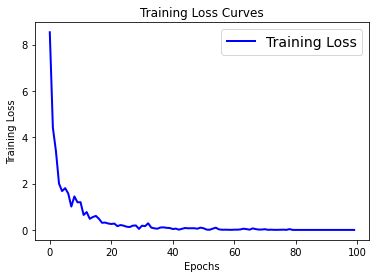

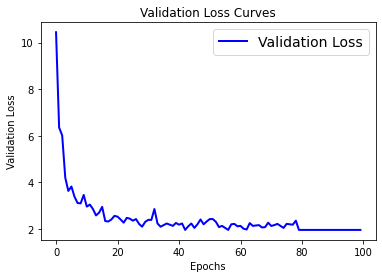

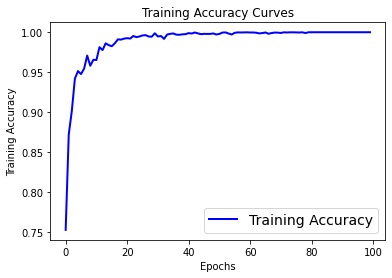

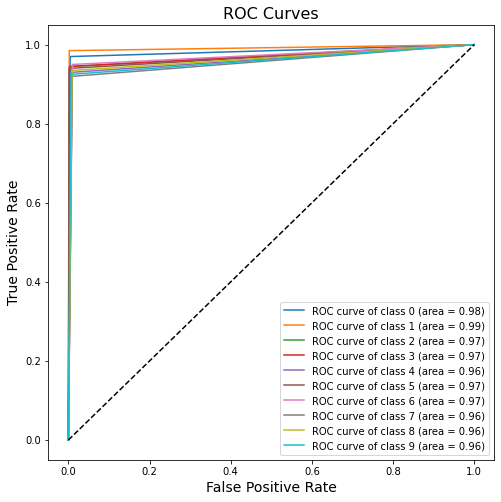

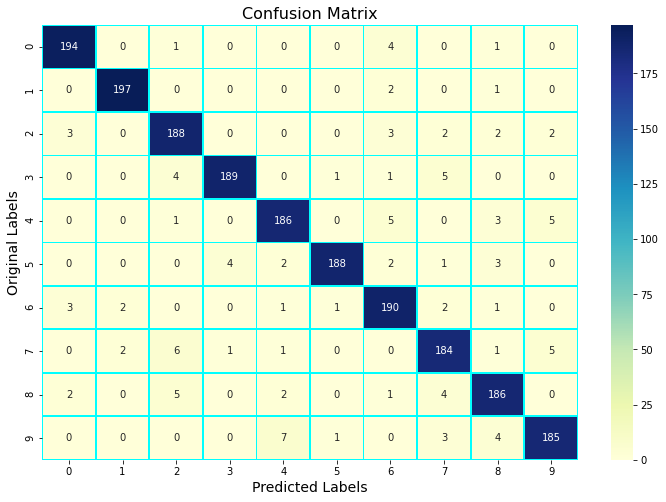

In [ ]:
# joblib.dump(obj2, '/content/drive/MyDrive/DL/Assignment_2/AdaGrad_Q2')
obj2 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/AdaGrad_Q2')
l1,l2=obj2.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj2.get_accuracy(), 'Training Accuracy')
obj2.roc_curve(X_test, y_test)
y_pred = obj2.predict(X_test)
heatMap(y_test, y_pred, (12,8))

# Adam

In [ ]:
obj3 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, optimizer='Adam')
obj3.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj3.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.706 - Training Loss: 10.171
Epoch:2/100 
	==============================> Training Accuracy: 0.880 - Training Loss: 4.133
Epoch:3/100 
	==============================> Training Accuracy: 0.932 - Training Loss: 2.358
Epoch:4/100 
	==============================> Training Accuracy: 0.924 - Training Loss: 2.611
Epoch:5/100 
	==============================> Training Accuracy: 0.961 - Training Loss: 1.357
Epoch:6/100 
	==============================> Training Accuracy: 0.963 - Training Loss: 1.288
Epoch:7/100 
	==============================> Training Accuracy: 0.948 - Training Loss: 1.796
Epoch:8/100 
	==============================> Training Accuracy: 0.957 - Training Loss: 1.499
Epoch:9/100 
	==============================> Training Accuracy: 0.960 - Training Loss: 1.370
Epoch:10/100 
	==============================> Training Accuracy: 0.977 - Training Loss: 0.781
Epoch:11/100 
	==============================> Training Ac

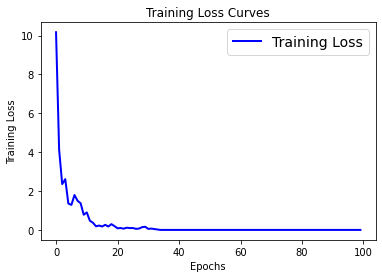

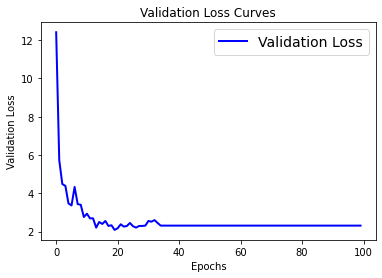

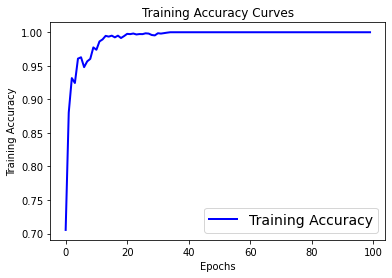

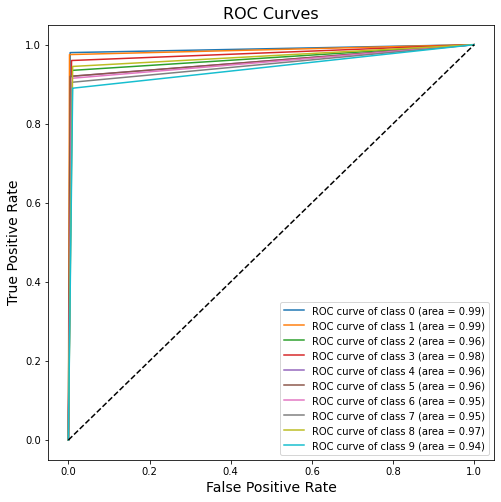

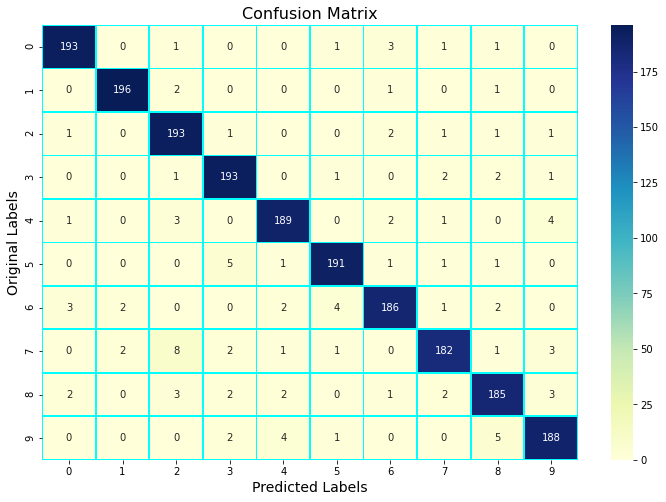

In [ ]:
# joblib.dump(obj3, '/content/drive/MyDrive/DL/Assignment_2/Adam_Q2')
obj3 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Adam_Q2')
l1,l2=obj3.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj3.get_accuracy(), 'Training Accuracy')
obj3.roc_curve(X_test, y_test)
y_pred = obj1.predict(X_test)
heatMap(y_test, y_pred, (12,8))

# Gradient with Momentum

In [ ]:
obj4 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, optimizer='GradMom')
obj4.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj4.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.259 - Training Loss: 25.597
Epoch:2/100 
	==============================> Training Accuracy: 0.266 - Training Loss: 25.351
Epoch:3/100 
	==============================> Training Accuracy: 0.359 - Training Loss: 22.132
Epoch:4/100 
	==============================> Training Accuracy: 0.423 - Training Loss: 19.929
Epoch:5/100 
	==============================> Training Accuracy: 0.472 - Training Loss: 18.230
Epoch:6/100 
	==============================> Training Accuracy: 0.569 - Training Loss: 14.883
Epoch:7/100 
	==============================> Training Accuracy: 0.622 - Training Loss: 13.049
Epoch:8/100 
	==============================> Training Accuracy: 0.640 - Training Loss: 12.420
Epoch:9/100 
	==============================> Training Accuracy: 0.683 - Training Loss: 10.945
Epoch:10/100 
	==============================> Training Accuracy: 0.706 - Training Loss: 10.151
Epoch:11/100 
	==============================> Tr

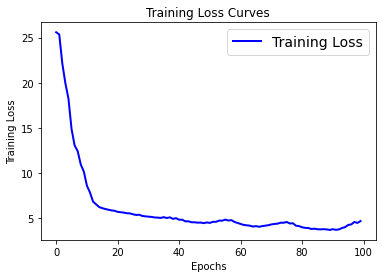

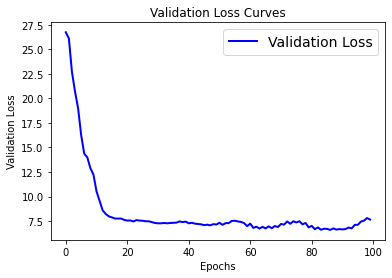

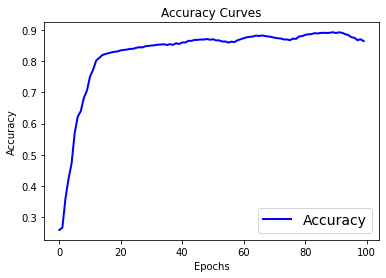

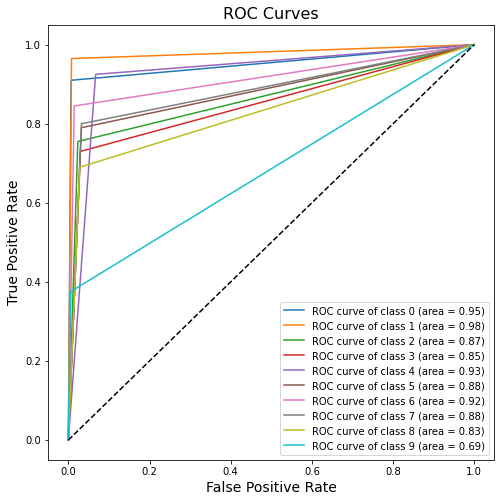

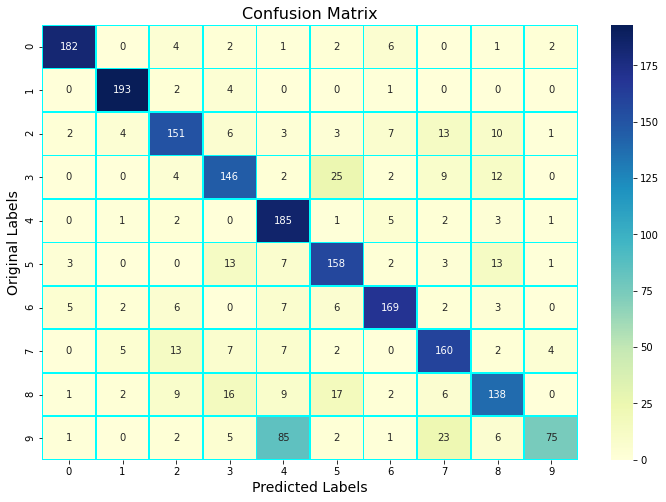

In [ ]:
# joblib.dump(obj4, '/content/drive/MyDrive/DL/Assignment_2/Mommentum_Q2')
obj4 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Mommentum_Q2')
l1, l2 = obj4.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj4.get_accuracy(), 'Accuracy')
obj4.roc_curve(X_test, y_test)
y_pred = obj4.predict(X_test)
heatMap(y_test, y_pred, (12,8))

# NAG

In [ ]:
obj5 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, optimizer='Nestrov')
obj5.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj5.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.259 - Training Loss: 25.589
Epoch:2/100 
	==============================> Training Accuracy: 0.436 - Training Loss: 19.476
Epoch:3/100 
	==============================> Training Accuracy: 0.410 - Training Loss: 20.381
Epoch:4/100 
	==============================> Training Accuracy: 0.546 - Training Loss: 15.667
Epoch:5/100 
	==============================> Training Accuracy: 0.608 - Training Loss: 13.543
Epoch:6/100 
	==============================> Training Accuracy: 0.653 - Training Loss: 11.985
Epoch:7/100 
	==============================> Training Accuracy: 0.683 - Training Loss: 10.945
Epoch:8/100 
	==============================> Training Accuracy: 0.715 - Training Loss: 9.854
Epoch:9/100 
	==============================> Training Accuracy: 0.730 - Training Loss: 9.329
Epoch:10/100 
	==============================> Training Accuracy: 0.744 - Training Loss: 8.849
Epoch:11/100 
	==============================> Train

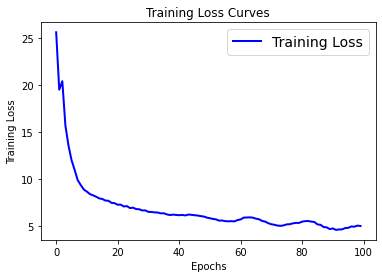

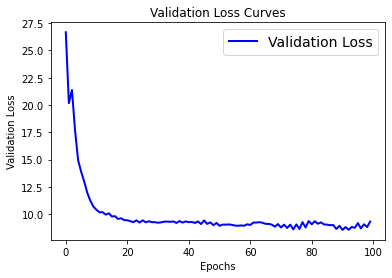

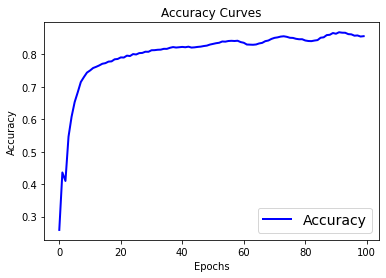

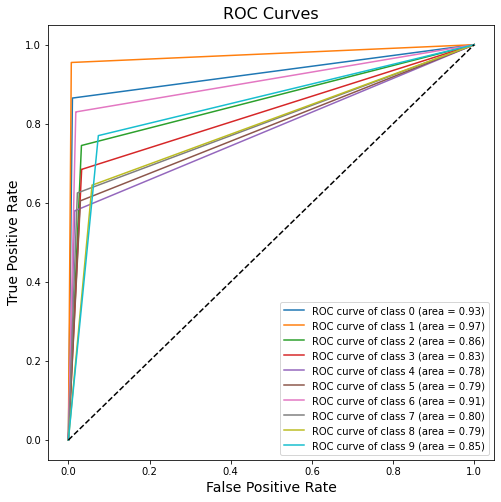

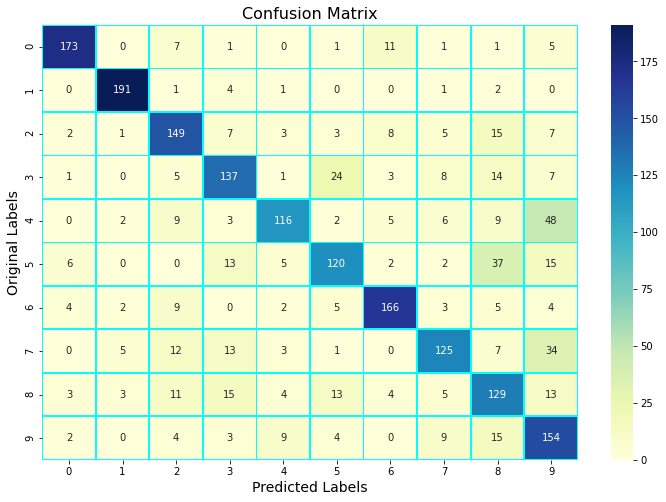

In [ ]:
# joblib.dump(obj5, '/content/drive/MyDrive/DL/Assignment_2/Nestrov_Q2')
obj5 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Nestrov_Q2')
l1, l2 = obj5.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj5.get_accuracy(), 'Accuracy')
obj5.roc_curve(X_test, y_test)
y_pred = obj5.predict(X_test)
heatMap(y_test, y_pred, (12,8))

# Gradient Descent with Momentum Optimizer and others commented

In [ ]:
# class GradientOptimizer:
#   def __init__(self, params, learning_rate_init=0.001):
#     self.params = [param for param in params]
#     self.learning_rate_init = float(learning_rate_init)

#   def update_param(self, gradients):
#     for i in range(len(self.params)):
#       self.params[i] -= (self.learning_rate_init * gradients[i]) 
#     return self.params

In [ ]:
# class GradMom:
#   def __init__(self,params,learning_rate_init=0.001,momentum=0.9):
#     self.params = [param for param in params]
#     self.learning_rate_init = float(learning_rate_init)
#     self.momentum = momentum
#     self.t = [np.zeros_like(param) for param in params]
#   def update_param(self, gradients):
#     for i in range(len(self.params)):
#        self.t[i] = self.momentum*self.t[i] - self.learning_rate_init*gradients[i] 
#        self.params[i] += self.t[i]
#       # print(self.t)
#       #self.t[i] *= self.momentum
#       #self.t[i] += self.learning_rate_init * gradients[i]
#       #self.params[i] -= self.t[i]
#     return self.params

Nestrov’s Accelerated Gradient Optimizer

In [ ]:
# class Nestrov:
#   def __init__(self, params, learning_rate_init=0.001, momentum=0.9):
#     self.params = [param for param in params]
#     self.learning_rate_init = float(learning_rate_init)
#     self.momentum = momentum
#     self.t = [param for param in params]
#     # self.v = None
        
#   # def update_param(self,  grads):
#   #       if self.v is None:
#   #           self.v = {}
#   #           self.v = [np.zeros_like(param) for param in self.params]
#   #           #for key, val in params.items():
#   #            #   self.v[key] = np.zeros_like(val)
            
#   #       for key in range(len(self.params)):
#   #           self.params[key] -= self.momentum * self.v[key]
#   #           #self.params[key] -= (1 + self.momentum) * self.learning_rate_init * grads[key]
#   #           #self.v[key] *= self.momentum
#   #           #self.v[key] -= self.learning_rate_init * grads[key]
#   #       return self.params
#   def update_param(self, gradients):
#     for i in range(len(self.params)):

#       # self.params[i] += self.momentum * self.momentum * self.t[i]
#       #  self.params[i] -= (1 + self.momentum) * self.learning_rate_init * gradients[i]
#       #  self.t[i] *= self.momentum
#       #  self.t[i] -= self.learning_rate_init * gradients[i]
#       self.t[i] *= self.momentum
#       self.t[i] += self.t[i]
#       self.t[i] += self.learning_rate_init * gradients[i]
#       self.params[i] -= self.t[i]
#     return self.params

RMSprop Optimizer

In [ ]:
# class RMSProp:
#   def __init__(self,params,learning_rate_init=0.001,d=0.9,e=1e-5):
#     self.params = [param for param in params]
#     self.learning_rate_init = float(learning_rate_init)
#     self.d = d
#     self.e = e
#     self.t = [np.zeros_like(param) for param in params]
#   def update_param(self,gradients):
#     for i in range(len(self.params)):
#       self.t[i] *= self.d
#       self.t[i] += (1 - self.d) * gradients[i] * gradients[i]
#       self.params[i] -= self.learning_rate_init * gradients[i] / (np.sqrt(self.t[i]) + self.e)
#     return self.params

AdaGrad Optimizer

In [ ]:
# class AdaGrad:
#     def __init__(self,params,learning_rate_init=0.001,e=1e-5):
#         self.params = [param for param in params]
#         self.learning_rate_init = float(learning_rate_init)
#         self.e = e
#         self.t = [np.zeros_like(param) for param in params]
        
#     def update_param(self,gradients):         
#       for i in range(len(self.params)):
#           self.t[i] += gradients[i] * gradients[i]
#           self.params[i] -= self.learning_rate_init * gradients[i] / (np.sqrt(self.t[i]) + self.e)
#       return self.params

Adam Optimizer

In [ ]:
# class Adam:
#     def __init__(self,params,learning_rate_init=0.001,e=1e-5,b1=0.9,b2=0.99):
#         self.params = [param for param in params]
#         self.learning_rate_init = learning_rate_init
#         self.b1 = b1
#         self.b2 = b2
#         self.k = 1
#         self.e = e
#         self.m = [np.zeros_like(param) for param in params]
#         self.v = [np.zeros_like(param) for param in params]
        
#     def update_param(self,gradients): 
#         t  = self.learning_rate_init * np.sqrt(1.0 - self.b2**self.k) / (1.0 - self.b1**self.k)  
#         self.k += 1       
        
#         for i in range(len(self.params)):
#             self.m[i] += (1 - self.b1) * (gradients[i] - self.m[i])
#             self.v[i] += (1 - self.b2) * (gradients[i]**2 - self.v[i])      
#             self.params[i] -= t * self.m[i] / (np.sqrt(self.v[i]) + self.e)
#         return self.params

In [ ]:
# class MLPClassifier:
#     def __init__(self, layers, X_test, y_test, learning_rate=1e-5, activation_function='relu', optimizer='gradient_descent', weight_init='random', regularization='l2', batch_size=64, num_epochs=100, dropouts=0.3, **kwargs):
#       self.layers = layers
#       self.lr = learning_rate
#       self.activation = activation_function
#       self.optimizer = optimizer
#       self.weight_init = weight_init
#       self.regularization = regularization
#       self.to=None
#       if(optimizer == 'gradient_descent' or optimizer == 'GradMom'):# or optimizer == 'Nestrov'):
#       #if(optimizer == 'gradient_descent'):
#         self.batch_size = -1
#       else:
#         self.batch_size = batch_size
#       self.num_epochs = num_epochs
#       self.dropouts = dropouts
#       self.X_test_ = X_test
#       self.y_test_ = y_test

#     def checking_accuracy(self, y_test, y_pred):
#       n=0
#       j=0
#       while (j<y_test.size): #test_accuracy
#         if (y_pred[j] == y_test[j]):
#           n+=1
#         j+=1
#       accu = n/j
#       return accu

#     def relu(self, X):
#       # for i in range(len(X)):  
#       #   X[i] = np.maximum(X[i], 0)
#       # return X
#       np.clip(X, 0, np.finfo(X.dtype).max, out=X)
#       return X

#     def sigmoid(self, x):
      
#       s=1/(1+np.exp(-x)) 
#       return s

#     def sigmoid_derivative(self, x):
#       s=1/(1+np.exp(-x)) 
#       return s*(1-s)
    
#     def tanh(self, x):
#       return np.tanh(x)

#     def tanh_derivative(self, x):
#       return 1-np.tanh(x)**2

#     def softmax(self, X):
#       # z -= np.max(z)
#       # return np.exp(z) / np.sum(np.exp(z))
#       tmp = X - X.max(axis=1)[:, np.newaxis]
#       np.exp(tmp, out=X)
#       X /= X.sum(axis=1)[:, np.newaxis]
#       return X

#     def relu_derivative(self, x):
#         x[x <= 0] = 0
#         x[x > 0] = 1
#         return x

#     def categorical(self, y, classes):
#       n_samples = y.shape[0]
#       n_classes = len(classes)
#       classes = np.asarray(classes)
#       sorted_class = np.sort(classes)

#       Y = np.zeros((n_samples, n_classes))
#       indices = np.searchsorted(sorted_class, y)
#       Y[np.arange(n_samples), indices] = 1
#       return Y

#     def form_batches(self,X,Y):
#         if(self.batch_size == -1):
#           self.batch_size = Y.shape[0]
#         batches=math.ceil(Y.shape[0]/self.batch_size)
#         feature_batches=np.array_split(X,batches,axis=0)
#         target_batches=np.array_split(Y,batches,axis=0)
#         return batches,feature_batches,target_batches

#     def cross_entropy_loss(self, y, yHat):

#       if y.shape[1] == 1:
#         return -np.log(yHat)
#       else:
#         return -np.log(1 - yHat)

#     def categorical_cross_entropy(self, y_orig, y_pred):
#       sum_score = 0.0
#       for i in range(len(y_orig)):
#         for j in range(len(y_orig[i])):
#           sum_score += y_orig[i][j] * np.log(1e-15 + y_pred[i][j])
#       mean_sum_score = 1.0 / len(y_orig) * sum_score
#       return -mean_sum_score

#     def fit(self, X_train, y_train):
#       self.parameters = {}

#       rand_state = np.random.RandomState(42)
#       for i in range(1, len(self.layers)):
#         self.parameters['w' + str(i)] = rand_state.uniform(-1., 1., (self.layers[i - 1], self.layers[i]))
#         self.parameters['b' + str(i)] = rand_state.uniform(-1., 1., self.layers[i])

#       self.loss_epochs, self.accuracy_epochs = [], []
#       self.testloss=[]

#       classes = list(set(y_train))
#       y_original = self.categorical(y_train, classes)
#       y_test11 = self.categorical(self.y_test_, classes)
#       X1=np.array(X_train)
#       Y1=np.array(y_original)
      
#       for j in range(self.num_epochs):
       

#         batches,X_train_,y_train_=self.form_batches(X1,Y1)
#         X_train_=np.array(X_train_)
#         y_train_=np.array(y_train_)

#         for b in range(batches):
        
#             y_pred, self.parameters = self.forward_prop(X_train_[b], self.parameters, self.layers)

#             self.parameters = self.back_prop(X_train_[b], y_train_[b], self.parameters, self.layers)
#             #print(1)
#             params, grads = [], []
#             for indx in "w", "b":
#                 for i in range(1, len(self.layers)):
#                     params.append(self.parameters[indx + str(i)])
#                     grads.append(self.parameters['d' + indx + str(i)])

#             params = np.array(params)
#             grads = np.array(grads)
           
#             if (self.optimizer=='RMS'):
#               optimizer = RMSProp(params, self.lr,0.9,1e-5)
#             elif (self.optimizer=='GradMom'):
#               optimizer = GradMom(params, self.lr,0.9)
              
#             elif (self.optimizer=='Nestrov'):
#               optimizer = Nestrov(params, self.lr,0.9)
#             elif (self.optimizer=='Ada'):
#               optimizer = AdaGrad(params, self.lr,1e-5)
#             elif (self.optimizer=='Adam'):
#               optimizer = Adam(params, self.lr,1e-5,0.9,0.99)
#             else: 
#               optimizer = GradientOptimizer(params, self.lr) 
            
#             params = optimizer.update_param(grads)

#             k = 0
#             for i in range(1, len(self.layers)):
#                 self.parameters['w' + str(i)] = params[k]
#                 k += 1

#             for i in range(1, len(self.layers)):
#                 self.parameters['b' + str(i)] = params[k]
#                 k += 1
            
        
        
#         # print("Epoch:{0:d}/{1:d} =======> loss: {2:.3f}".format(j, self.num_epochs, c_loss))
#         if j == 0:
#             self.oneHot_Orig = dict()
#             for i in range(len(y_original)):
#                 self.oneHot_Orig[str(y_original[i])] = y_train[i]
#                 if (len(self.oneHot_Orig) == len(classes)):
#                   break

#         y_pred, _ = self.forward_prop(X_train, self.parameters, self.layers)
#         c_loss = self.categorical_cross_entropy(y_original, y_pred)
#         y_pred1, _ = self.forward_prop(self.X_test_, self.parameters, self.layers)
#         c_loss1 = self.categorical_cross_entropy(y_test11, y_pred1)
#         y_p = self.convert_to_labels(y_pred)
#         accu = self.checking_accuracy(y_train, y_p)
#         self.loss_epochs.append(c_loss)
#         self.testloss.append(c_loss1)
#         self.accuracy_epochs.append(accu)
#         print("Epoch:{0:d}/{1:d} \n\t==============================> Training Accuracy: {2:.3f} - Training Loss: {3:.3f}".format(j+1, self.num_epochs, accu, c_loss))

#     def activation_forward(self, parameters, layers, activat, i):
#       if len(layers)-1 == i:
#         parameters['y'] = self.softmax(parameters['z' + str(i)])
#       elif activat == 'sigmoid':
#         parameters['x' + str(i)] = self.sigmoid(parameters['z' + str(i)])
#       elif activat == 'tanh':
#         parameters['x' + str(i)] = self.tanh(parameters['z' + str(i)])
#       else:
#         parameters['x' + str(i)] = self.relu(parameters['z' + str(i)])
#       return parameters

#     def forward_prop(self, data, parameters, layers):
      
#       parameters['x' + str(0)] = data

#       for i in range(1, len(layers)):
#           parameters['z' + str(i)] = np.add(np.dot(parameters['x' + str(i - 1)], parameters['w' + str(i)]),
#                                             parameters['b' + str(i)])

#           parameters = self.activation_forward(parameters, layers, self.activation, i)

#       return parameters['y'], parameters


#     def back_prop(self, X_train, Y, parameters, layers):
#       m = X_train.shape[0]
#       total_layers = len(layers)
#       parameters['dz' + str(total_layers - 1)] = (1 / m) * (parameters['y'] - Y)
#       parameters['dw' + str(total_layers - 1)] = np.dot((parameters['x' + str(total_layers - 2)]).T,
#                                                         parameters['dz' + str(total_layers - 1)])
#       parameters['db' + str(total_layers - 1)] = parameters['dz' + str(total_layers - 1)].sum()

#       for i in range(total_layers - 2, 0, -1): #From output layer towards input layer
#           if (self.activation == 'sigmoid'):
#             parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
#                                                 (self.sigmoid_derivative(parameters['z' + str(i)])))
#           elif (self.activation == 'tanh'):
#             parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
#                                                 (self.tanh_derivative(parameters['z' + str(i)])))
#           else:
#             parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
#                                                 (self.relu_derivative(parameters['z' + str(i)])))
#           parameters['dw' + str(i)] = np.dot((parameters['x' + str(i - 1)]).T, parameters['dz' + str(i)])
#           parameters['db' + str(i)] = parameters['dz' + str(i)].sum()
#       return parameters

#     def convert_to_labels(self, y_test):
#       y_test = (y_test == y_test.max(axis=1)[:, None]).astype(float)
#       res = []
#       # print(self.oneHot_Orig)
#       for i in range(y_test.shape[0]):
#         try:
#           res.append(self.oneHot_Orig[str(y_test[i])])
#         except:
#           res.append(0)

#       return np.array(res)

#     def roc_curve(self, X_test, y_test):
#       classes = list(set(y_test))
#       n_classes = len(classes)
#       y_original = self.categorical(y_test, classes)
#       fpr = dict()
#       tpr = dict()
#       roc_auc = dict()
#       y_score, _ = self.forward_prop(X_test, self.parameters, self.layers)
#       for i in range(len(classes)):
#           fpr[i], tpr[i], _ = metrics.roc_curve(y_original[:, i], y_score[:, i])
#           roc_auc[i] = metrics.auc(fpr[i], tpr[i])
#       # print(self.fpr, self.tpr)
#       all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#       mean_tpr = np.zeros_like(all_fpr)
#       for i in range(n_classes):
#           mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      
#       mean_tpr /= n_classes

#       plt.figure(figsize=[8,8])
#       for i in range(n_classes):
#           plt.plot(fpr[i], tpr[i],
#                   label='ROC curve of class {0} (area = {1:0.2f})'
#                   ''.format(i, roc_auc[i]))

#       plt.plot([0, 1], [0, 1], 'k--')
      
#       plt.xlabel('False Positive Rate', size=14)
#       plt.ylabel('True Positive Rate', size=14)
#       plt.title('ROC Curves', size=16)
#       plt.legend(loc="lower right")
#       plt.show()

#     def predict(self, X_test):

#       y_test, self.parameters = self.forward_prop(X_test, self.parameters, self.layers)
#       return self.convert_to_labels(y_test)
      

#     def predict_proba(self, X_test):
#       y_test, self.parameters = self.forward_prop(X_test, self.parameters, self.layers)
#       return y_test

#     def get_params(self):
#       return self.parameters
    
#     def score(self, X, y):
#       y_pred = self.predict(X)
#       return self.checking_accuracy(y, y_pred)
    
#     def get_loss(self):
#       return self.loss_epochs,self.testloss
#     def get_accuracy(self):
#       return self.accuracy_epochs